# Observations
1. Based on our boxplot, Capomulin and Ramicane are more successful than Infubinol and Ceftamin. The final tumor volumes for Capomulin and Ramicane which much lower than the other two.
2. For Capomulin, the larger the mouse was, generally, the larger their tumor was. We see this on the scatter plot.
3. For Capomulin, as 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
#Importing files
mouse_data = "../../../working/05-Matplotlib/Homework/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results = "../../../working/05-Matplotlib/Homework/Instructions/Pymaceuticals/data/Study_results.csv"

mouse_data_df = pd.read_csv(mouse_data)
study_results_df = pd.read_csv(study_results)

In [3]:
#Mouse data DataFrame
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
#Study Results DataFrame
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
#Merging our two dataframes
merge_df = pd.merge(mouse_data_df, study_results_df, on = "Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#Finding the duplicated row
duplicated_row = merge_df[merge_df.duplicated(keep = False)]
duplicated_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [7]:
#Deleting the duplicated row from our dataframe
merge_df = merge_df.drop(908)
merge_df = merge_df.drop(909)
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary Statistics Table

In [8]:
#Calculating mean of tumor volume
mean_vol = merge_df['Tumor Volume (mm3)'].mean()
mean_vol

50.45414306457959

In [9]:
#Calculating median of tumor volume
median_vol = merge_df['Tumor Volume (mm3)'].median()
median_vol


48.95791906

In [10]:
#Calculating variance of tumor volume
var_vol = merge_df.var()['Tumor Volume (mm3)']
var_vol

79.16834895592136

In [11]:
#Calculating standard deviation of tumor volume
std_vol = merge_df.std()['Tumor Volume (mm3)']
std_vol

8.89765974601869

In [12]:
#Calculating SEM of tumor volume
sem_vol = merge_df.sem()['Tumor Volume (mm3)']
sem_vol

0.20461149544872292

In [13]:
#Creating summary statistics table for tumor volume

summary_stats_df = pd.DataFrame(
    {"Mean of Tumor Volume": [mean_vol],
     "Median of Tumor Volume": [median_vol],
     "Variance of Tumor Volume": [var_vol],
     "Standard Deviation of Tumor Volume": [std_vol],
     "SEM of Tumor Volume": [sem_vol]
    }
)

summary_stats_df.head()

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
0,50.454143,48.957919,79.168349,8.89766,0.204611


# Bar Plot: Total Measurements for Regimens 

Text(0, 0.5, 'Number of Measurements')

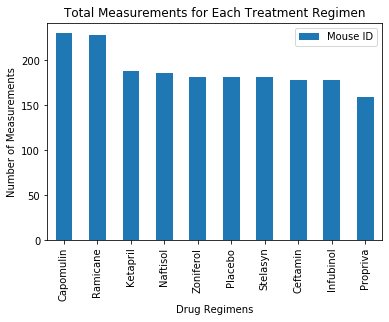

In [14]:
#Creating bar graph using Pandas to show total number of measurements taken for each treatment regimen

#Creating a new data frame with only the Mouse ID and Drug Regimen columns
mouse_drug_df = merge_df[['Mouse ID', 'Drug Regimen']]

#Calculating total number of measurements per drug regimen
mouse_drug_df = mouse_drug_df.groupby('Drug Regimen').count()

#Sorting our dataframe from highest number of measurements to lowest
mouse_drug_df = mouse_drug_df.sort_values(by = 'Mouse ID', ascending = False)

#Creating bar graph based on our dataframe
mouse_drug_df.plot.bar()

#Placing title and axis titles 
plt.title("Total Measurements for Each Treatment Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements")
#plt.xlim(-0.75, len(merge_df['Drug Regimen']-0.25))
#plt.xlim(.75,.75)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

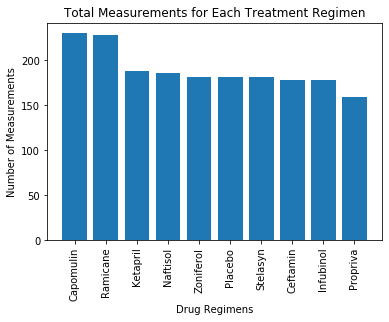

In [15]:
#Plotting with Matplotlib

plt.bar(mouse_drug_df.index.values, mouse_drug_df["Mouse ID"])
plt.title("Total Measurements for Each Treatment Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements")
plt.xticks(rotation="vertical")

# Pie Plot Based on Gender of Mouse

In [16]:
#Creating pie chart that shows distribution of female and male mice in the study using Pandas

#Creating a new dataframe that groups merge_df by "Sex"
groupby_gender_df = merge_df.groupby(['Sex'])

#Counting the number of female mice and male mice 
gender_count = groupby_gender_df.count()
gender_count

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,933,933,933,933,933,933,933
Male,958,958,958,958,958,958,958


(-1.1048958498515298,
 1.100233161810833,
 -1.102935641318436,
 1.1056031302324567)

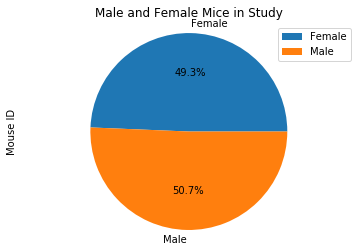

In [17]:
#Creating a pie chart using Pandas
var = gender_count.plot(kind = "pie", y= "Mouse ID", title = ("Male and Female Mice in Study"), autopct='%1.1f%%')
plt.axis("equal")

In [18]:
gender_count.head()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,933,933,933,933,933,933,933
Male,958,958,958,958,958,958,958


Text(0, 0.5, 'Sex')

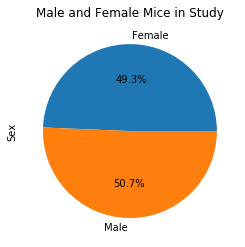

In [19]:
#Creating pie chart that shows distribution of female and male mice in the study using Matplotlibs
plt.pie(gender_count['Mouse ID'], labels = gender_count.index, autopct="%1.1f%%")
plt.title("Male and Female Mice in Study")
#plt.legend(loc="upper right")
plt.ylabel("Sex")

# Quartiles, Outliers, and Boxplots

In [20]:
#Calculating final tumor volume across for most promising treatments: Capomulin, Ramicane, Infubinol, and Ceftamin

#Looking at data for Capomulin
capomulin_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [21]:
#Box and whisker plot for capomlin
#fig1, ax1 = plt.subplots()
#ax1.set_title('Title')
#ax1.set_ylabel('Y Label')
#ax1.boxplot(capomulin_df["Tumor Volume (mm3)"])
#plt.show()

In [22]:
#Finding highest value in "Timepoint" for each mouse
#max_timepoint_cap = capomulin_df.loc[capomulin_df["Timepoint"].idxmax()]
#max_timepoint_cap

max_timepoint = merge_df.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [23]:
#Merging max timepoints and merge_df
last_timepoint_df = pd.merge(merge_df, max_timepoint, on = "Mouse ID")
last_timepoint_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1886,z969,Naftisol,Male,9,30,25,63.145652,2,45
1887,z969,Naftisol,Male,9,30,30,65.841013,3,45
1888,z969,Naftisol,Male,9,30,35,69.176246,4,45
1889,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [24]:
#Final tumor volume for Capomulin
#max_tumor_cap = max_timepoint_cap["Tumor Volume (mm3)"]
#max_tumor_cap

In [25]:
#Looking at data for Ramicane
#ramicane_df = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane"]
#ramicane_df

In [26]:
#Finding highest value in "Timepoint" for Ramicane
#max_timepoint_ram = ramicane_df.loc[ramicane_df["Timepoint"].idxmax()]
#max_timepoint_ram

In [27]:
#Final tumor volume for Ramicane
#max_tumor_ram = max_timepoint_ram["Tumor Volume (mm3)"]
#max_tumor_ram

In [28]:
#Plot for ramicane
#fig1, ax1 = plt.subplots()
#ax1.set_title('Title')
#ax1.set_ylabel('Y Label')
#ax1.boxplot(ramicane_df["Tumor Volume (mm3)"])
#plt.show()

In [29]:
#Looking at data for Infubinol
infubinol_df = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol"]
infubinol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [30]:
#Finding highest value in "Timepoint" for Infubinol
max_timepoint_inf = infubinol_df.loc[infubinol_df["Timepoint"].idxmax()]
max_timepoint_inf

Mouse ID                   a203
Drug Regimen          Infubinol
Sex                      Female
Age_months                   20
Weight (g)                   23
Timepoint                    45
Tumor Volume (mm3)      67.9734
Metastatic Sites              2
Name: 463, dtype: object

In [31]:
#Final tumor volume for Infubinol
max_tumor_inf = max_timepoint_inf["Tumor Volume (mm3)"]
max_tumor_inf

67.97341878

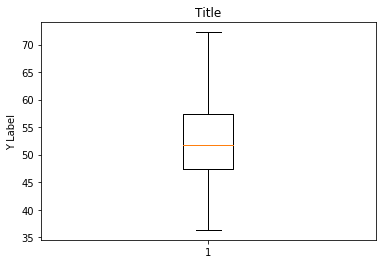

In [32]:
#Plot for infubinol
fig1, ax1 = plt.subplots()
ax1.set_title('Title')
ax1.set_ylabel('Y Label')
ax1.boxplot(infubinol_df["Tumor Volume (mm3)"])
plt.show()

In [33]:
#Looking at data for Ceftamin
ceftamin_df = merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin"]
ceftamin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [34]:
#Finding highest value in "Timepoint" for Ceftamin
max_timepoint_ceft = ceftamin_df.loc[ceftamin_df["Timepoint"].idxmax()]
max_timepoint_ceft

Mouse ID                  a275
Drug Regimen          Ceftamin
Sex                     Female
Age_months                  20
Weight (g)                  28
Timepoint                   45
Tumor Volume (mm3)     62.9994
Metastatic Sites             3
Name: 493, dtype: object

In [35]:
#Final tumor volume for Ceftamin
max_tumor_ceft = max_timepoint_ceft["Tumor Volume (mm3)"]
max_tumor_ceft

62.99935619

In [45]:
#Create a series with all the final tumor volumes
#final_tumor_volumes = pd.Series([max_tumor_cap, max_tumor_ram, max_tumor_inf, max_tumor_ceft])
#final_tumor_volumes

In [83]:
#Creating a loop to get a list of all the tumor volumes for each of the 4 drug regimens
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []

Values for Capomulin that are below 26.714832162499995 could be outliers.
Values for Capomulin that are above 55.9711007025 could be outliers.
Values for Ramicane that are below 24.18658646249998 could be outliers.
Values for Ramicane that are above 57.48804812250001 could be outliers.
Values for Infubinol that are below 32.309217298749985 could be outliers.
Values for Infubinol that are above 72.31757996875001 could be outliers.
Values for Ceftamin that are below 32.818911426250004 could be outliers.
Values for Ceftamin that are above 71.19095325625 could be outliers.


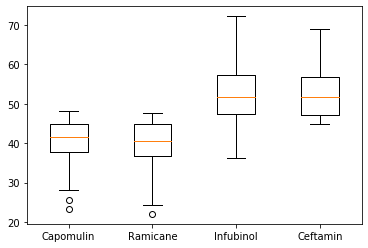

In [84]:
for x in regimen_list:
    tumor_volume = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"] == x, 'Tumor Volume (mm3)']
    
    
    tumor_vol_list.append(tumor_volume)
   
    quartiles = tumor_volume.quantile([.25, .5, .75])
    upper_quartile = quartiles[.75]
    lower_quartile = quartiles[.25]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    print(f"Values for {x} that are below {lower_bound} could be outliers.")
    print(f"Values for {x} that are above {upper_bound} could be outliers.")

plt.boxplot(x = tumor_vol_list, labels = regimen_list)
plt.show()

# Line and Scatter Plots

In [44]:
#Looking for which mice were treated with Capomulin
capomulin_data = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [132]:
#Information on chosen mouse
cap_mouse = merge_df.iloc[440, :]
cap_mouse

Mouse ID                   i557
Drug Regimen          Capomulin
Sex                      Female
Age_months                    1
Weight (g)                   24
Timepoint                    45
Tumor Volume (mm3)       47.686
Metastatic Sites              1
Name: 440, dtype: object

In [140]:
mouse_info = merge_df.loc[merge_df["Mouse ID"] == "s185"]
mouse_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [141]:
x_axis = cap_mouse['Timepoint']
y_axis = cap_mouse['Tumor Volume (mm3)']
x_axis

45

Text(0, 0.5, 'Tumor Volume (mm3)')

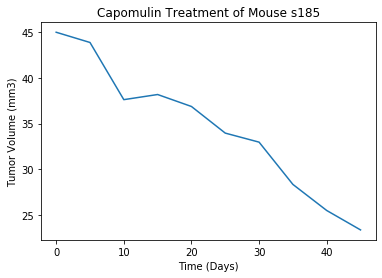

In [143]:
plt.plot(mouse_info["Timepoint"], mouse_info["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

In [87]:
tumor_avg_cap

,Age_months,Timepoint,Tumor Volume (mm3),Metastatic Sites
Weight (g),,,,
15,16.000000,22.500000,36.182040,0.000000
17,14.769231,21.538462,37.214133,1.030769
19,7.666667,22.500000,41.182391,0.700000
20,23.000000,22.500000,39.141053,0.600000
21,17.458333,21.666667,42.088700,0.625000
22,15.500000,22.500000,43.288490,0.850000
23,6.478261,20.217391,43.341051,0.521739
24,1.000000,22.500000,44.805810,0.200000
25,14.857143,18.214286,44.062109,0.642857


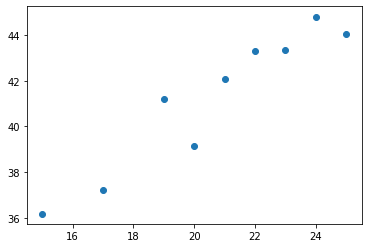

In [86]:
#Creating scatter plot of average tumor volume vs. mouse weight for Capomulin regimen

#Call Capomulin dataframe
avg = capomulin_df.groupby(["Weight (g)"])
tumor_avg_cap = avg.mean()

#average = capomulin_df["Tumor Volume (mm3)"].mean()
plt.scatter(tumor_avg_cap.index, tumor_avg_cap["Tumor Volume (mm3)"])


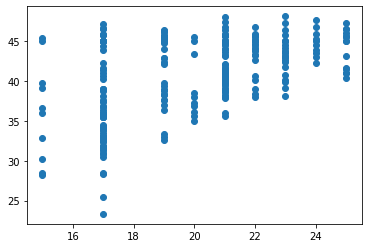

In [90]:
#or is it this?
#volume = capomulin_df.sort_values(["Tumor Volume (mm3)"])
plt.scatter(capomulin_df["Weight (g)"], capomulin_df["Tumor Volume (mm3)"])
#plt.ylim(34,46)
#plt.xlim(14,25)
#plt.show

# Correlation and Regression

In [51]:
#Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight_cap = capomulin_df.iloc[:,4]
tumor_vol_cap= capomulin_df.iloc[:,6]
correlation = st.pearsonr(mouse_weight_cap, tumor_vol_cap)
correlation[0]

0.525699555207717

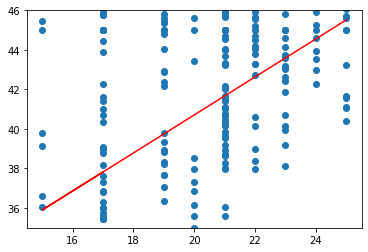

In [93]:
#Linear regression model
x_values = capomulin_df["Weight (g)"]
y_values = capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylim(35,46)
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
#plt.xlabel('Rooms in House')
#plt.ylabel('Median House Prices ($1000)')
#print(f"The r-squared is: {rvalue**2}") #tells how well fit the line is I think?

plt.show()